In [1]:
import pvdeg

import xarray as xr
import pandas as pd
import inspire_agrivolt

In [ ]:
WEATHER_DB = "NSRDB"
WEATHER_ARG = {
    "satellite": "Americas",
    "names": "TMY",
    "NREL_HPC": True,
    "attributes": pvdeg.pysam.INSPIRE_NSRDB_ATTRIBUTES,
}

In [13]:
weather, meta, chunk_size = inspire_agrivolt.load_weather(local_test_paths=None, state="Colorado")

/home/tford/.conda-envs/geospatial/lib/python3.9/site-packages/xarray/core/dataset.py:277: UserWarning: The specified chunks separate the stored chunks along dimension "phony_dim_1" starting at index 500. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


In [ ]:
pd.testing.assert_

In [ ]:
weather["time"] = np.asanny

<xarray.DataArray 'time' (time: 8760)> Size: 70kB
array(['2023-01-01T00:30:00.000000000', '2023-01-01T01:30:00.000000000',
       '2023-01-01T02:30:00.000000000', ..., '2023-12-31T21:30:00.000000000',
       '2023-12-31T22:30:00.000000000', '2023-12-31T23:30:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 70kB 2023-01-01T00:30:00 ... 2023-12-31T23...

In [20]:
meta.iloc[12:15].index

Index([390699, 390700, 390701], dtype='int64')

In [10]:
pvdeg.weather.get(
    WEATHER_DB,
    geospatial=True, 
    **WEATHER_ARG
)

/home/tford/.conda-envs/geospatial/lib/python3.9/site-packages/xarray/core/dataset.py:277: UserWarning: The specified chunks separate the stored chunks along dimension "phony_dim_1" starting at index 500. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


(<xarray.Dataset> Size: 1TB
 Dimensions:            (time: 8760, gid: 2018267)
 Coordinates:
   * gid                (gid) int64 16MB 0 1 2 3 ... 2018264 2018265 2018266
   * time               (time) datetime64[ns] 70kB 2023-01-01T00:30:00 ... 202...
 Data variables:
     temp_air           (time, gid) float64 141GB dask.array<chunksize=(8760, 500), meta=np.ndarray>
     wind_speed         (time, gid) float64 141GB dask.array<chunksize=(8760, 500), meta=np.ndarray>
     wind_direction     (time, gid) float64 141GB dask.array<chunksize=(8760, 500), meta=np.ndarray>
     dhi                (time, gid) float64 141GB dask.array<chunksize=(8760, 500), meta=np.ndarray>
     ghi                (time, gid) float64 141GB dask.array<chunksize=(8760, 500), meta=np.ndarray>
     dni                (time, gid) float64 141GB dask.array<chunksize=(8760, 500), meta=np.ndarray>
     relative_humidity  (time, gid) float64 141GB dask.array<chunksize=(8760, 500), meta=np.ndarray>
     surface_albedo     

In [7]:
len(meta)

0

In [49]:
"wind_direction" in geo_weather.data_vars

True

In [46]:
geo_weather = geo_weather.assign(wind_direction=geo_weather["temp_air"] * 0)
geo_weather = geo_weather.assign(albedo=geo_weather["temp_air"] * 0 + 0.2) 

geo_weather

<xarray.Dataset> Size: 44MB
Dimensions:            (time: 8760, gid: 79)
Coordinates:
  * gid                (gid) int64 632B 150803 150883 150963 ... 1260496 1364159
  * time               (time) datetime64[ns] 70kB 2023-01-01T00:30:00 ... 202...
Data variables:
    temp_air           (time, gid) float64 6MB -2.9 -0.4 -3.1 ... 5.4 9.4 -1.7
    wind_speed         (time, gid) float64 6MB ...
    dhi                (time, gid) float64 6MB ...
    ghi                (time, gid) float64 6MB ...
    dni                (time, gid) float64 6MB ...
    relative_humidity  (time, gid) float64 6MB ...
    wind_direction     (time, gid) float64 6MB -0.0 -0.0 -0.0 ... 0.0 0.0 -0.0
    albedo             (time, gid) float64 6MB 0.2 0.2 0.2 0.2 ... 0.2 0.2 0.2

In [42]:
geo_weather = xr.open_dataset("C:/Users/tford/Downloads/small-usa-tmy.nc")
geo_meta = pd.read_csv("C:/Users/tford/Downloads/small-usa-tmy.csv", index_col=0)

weather_df = geo_weather.isel(gid=0).to_dataframe()
meta = geo_meta.iloc[0].to_dict()

# add placeholder wind and albedo data
# this will come from the NSRDB but this file does not contain it
weather_df["wind_direction"] = 0
weather_df["albedo"] = 0.2

In [25]:
conf = "01"

single_loc_res = pvdeg.pysam.inspire_ground_irradiance(
    weather_df=weather_df,
    meta=meta,
    config_files={"pv":f"C:/Users/tford/dev/InSPIRE/Studies/USMap_Doubleday_2024/SAM/{conf}/{conf}_pvsamv1.json"}
)

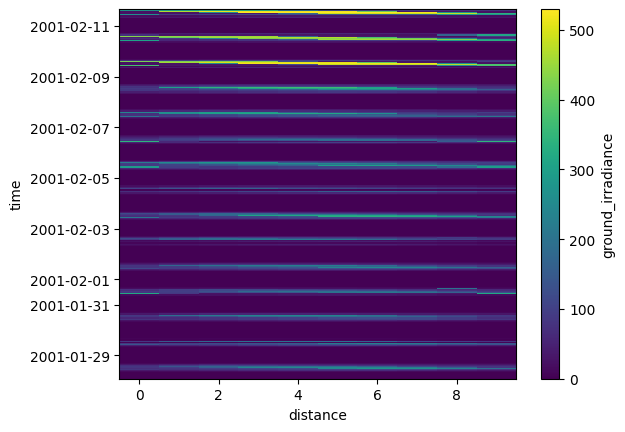

In [ ]:
# 15 day plot we can see that they all have values
single_loc_res.ground_irradiance.isel(time=slice(650,1000)).plot()